# Lab 7: Simple Linear Regression
In this tutorial, we will walk through different steps of linear regression modeling introduced in the lecture. We will be working on __The World Happiness Dataset__ from Kaggle website:<br>
https://www.kaggle.com/unsdsn/world-happiness <br>
You will need to modify and combine these steps into several functions for the Assignment.

In [1]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as so
import pandas as pd
import numpy as np
import seaborn as sns

## Import the dataset

In [2]:
df = pd.read_csv("2019.csv")
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


<Axes: xlabel='Generosity', ylabel='Score'>

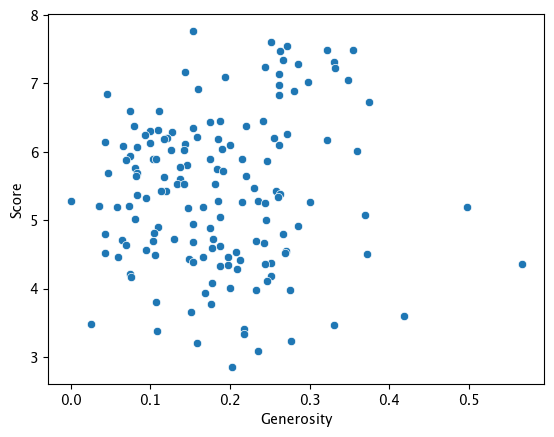

In [4]:
sns.scatterplot(x = "Generosity", y="Score", data=df)

## Relationship between Happiness score and other variables
Here, we will be using scatter plots to have a quick look at the relationship between Happiness score of countries and other variables reported in the dataset. <br>
What do you think about the relationship between the happiness score and the variable on the y-axis?

<Axes: xlabel='Healthy life expectancy', ylabel='Score'>

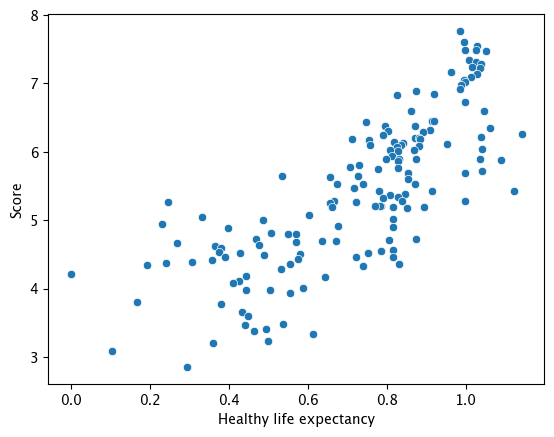

In [5]:
sns.scatterplot(x = "Healthy life expectancy", y="Score", data=df)

## Fit a linear regression line "by hand"
Let's take a closet look at the relationship between Happiness Score and Healthy life expectancy.<br>
We will fit a linear regression line to the data.<br>
The formula: _y = b0 + b1*x_

In [ ]:
y1 = df["Score"].values
x1 = df["Healthy life expectancy"].values
print(type(x1))

In [8]:
def simpleRegPredict(b, x):
    yp = b[0] + b[1] * x
    return yp

In [9]:
yp1 = simpleRegPredict(b = [0.1, 2], x=x1)
print(yp1)

[2.072 2.092 2.156 2.152 2.098 2.204 2.118 2.152 2.178 2.132 2.172 2.026
 2.158 2.124 2.092 2.098 2.074 2.072 1.848 1.94  1.75  2.098 1.822 2.19
 1.928 1.94  1.592 1.69  1.842 2.224 1.92  1.704 1.882 2.382 1.678 2.178
 1.842 1.862 1.526 1.868 1.612 1.736 1.782 2.006 1.77  1.616 1.862 1.75
 2.184 1.836 1.716 1.756 1.724 2.172 1.848 1.762 1.696 2.276 1.756 1.558
 1.512 1.756 1.654 2.184 1.808 2.098 1.17  1.552 1.414 1.808 1.578 1.446
 1.842 1.536 1.928 2.344 1.658 1.79  1.716 1.756 1.678 2.098 1.434 1.776
 0.59  1.546 1.414 1.67  1.664 1.638 1.73  1.42  1.886 1.802 1.308 0.762
 1.73  1.072 0.564 1.454 1.73  0.894 1.116 1.242 1.202 1.038 1.848 1.71
 1.374 1.444 1.242 0.636 1.054 0.832 0.86  1.73  1.67  0.85  1.604 0.956
 1.262 1.078 0.88  1.73  1.546 1.248 0.814 0.716 0.584 1.762 1.21  0.484
 1.578 1.164 0.1   0.986 1.388 0.952 0.92  1.276 0.986 1.11  1.21  0.436
 0.86  0.966 0.998 1.176 0.98  1.09  1.026 1.328 1.098 0.822 0.31  0.69 ]


### Playing around with regression coefficients
We'll be using the simpleregPredict function to predict y-values

#### 1. do the scatter plot
plot _Healthy life expectancy_ against _Score_

In [11]:
def plotPrediction(b, x, y, predictFnc = simpleRegPredict):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(x, y)
    xp = np.linspace(min(x), max(x), num=50)
    yp = predictFnc(b, xp)
    return ax.plot(xp, yp, 'r')

#### 2. plot a linear regression line 
We will do this step for different regression coefficient arrays

In [12]:
x_simulated = np.linspace(min(x1), max(x1), num=len(x1))

b1 = [0, 1]
yp1 = simpleRegPredict(b = b1, x = x_simulated)
print(yp1)

[0.         0.00736129 0.01472258 0.02208387 0.02944516 0.03680645
 0.04416774 0.05152903 0.05889032 0.06625161 0.0736129  0.08097419
 0.08833548 0.09569677 0.10305806 0.11041935 0.11778065 0.12514194
 0.13250323 0.13986452 0.14722581 0.1545871  0.16194839 0.16930968
 0.17667097 0.18403226 0.19139355 0.19875484 0.20611613 0.21347742
 0.22083871 0.2282     0.23556129 0.24292258 0.25028387 0.25764516
 0.26500645 0.27236774 0.27972903 0.28709032 0.29445161 0.3018129
 0.30917419 0.31653548 0.32389677 0.33125806 0.33861935 0.34598065
 0.35334194 0.36070323 0.36806452 0.37542581 0.3827871  0.39014839
 0.39750968 0.40487097 0.41223226 0.41959355 0.42695484 0.43431613
 0.44167742 0.44903871 0.4564     0.46376129 0.47112258 0.47848387
 0.48584516 0.49320645 0.50056774 0.50792903 0.51529032 0.52265161
 0.5300129  0.53737419 0.54473548 0.55209677 0.55945806 0.56681935
 0.57418065 0.58154194 0.58890323 0.59626452 0.60362581 0.6109871
 0.61834839 0.62570968 0.63307097 0.64043226 0.64779355 0.655154

#### 3. plot the regression line for the two regression models on top of the scatter plot
* when plotting the linear regression, we will create a new "x" array and use it for plotting

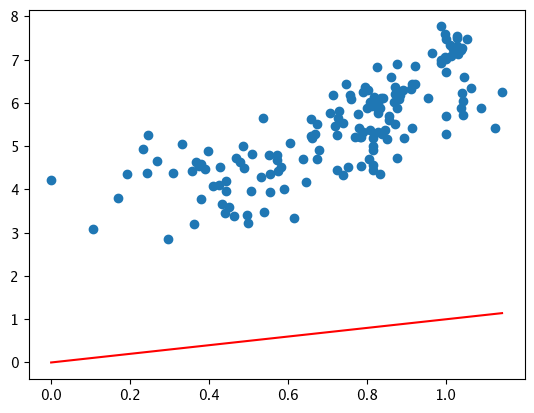

In [13]:
plotPrediction(b1, x1, y1, predictFnc=simpleRegPredict)

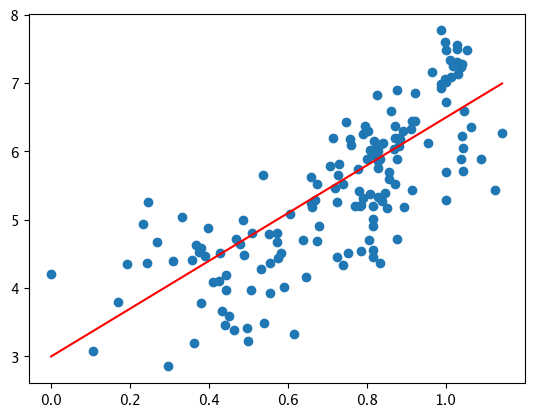

In [14]:
# Eye balling this better
b2 = [3, 3.5]
plotPrediction(b2, x1, y1, predictFnc=simpleRegPredict)

In [16]:
yp3 = simpleRegPredict(b2, x1)
res = y1 - yp3
res2 = res**2
rss = sum(res2)
print(rss)

77.9958295


In [17]:
yp1 = simpleRegPredict(b1, x1)
res = y1 - yp1
res2 = res**2
rss = sum(res2)
print(rss)

3555.4587670000024


### Define the _Residual Sum of Squares_ loss function and its derivative
We can go on forever, playaround with the coefficients and look at the line! But that's neither efficient nor optimal! So we will take on another approach!<br>
We will define a __loss__ function and try to find the coefficients for which this __loss__ function becomes minimum. The function will take in the regression coefficient array, x, and y and returns both the __rss__ and __gradient__ (vector of partial derivatives).
Then it should do the following steps:
* use b and x as inputs to the linear regression function and get the predicted y values
* Calculate the residual sum of squares
* calculate the derivatives

In [18]:
deriv = [0,0]
b3 = [3, 3.5]
res = y1 - simpleRegPredict(b3, x1)
res2 = res**2
rss = sum(res2)

deriv[0] = -2*sum(res)
deriv[1] = -2*sum(res * x1)
print(deriv[0], deriv[1])

40.952000000000034 28.148760000000006


In [19]:
def simpleRegLossRSS(b, x, y):
    predY = simpleRegPredict(b, x)
    res = y - predY
    rss = sum(res**2)

    deriv[0] = -2*sum(res)
    deriv[1] = -2*sum(res * x1)

    return (rss, deriv)


In [23]:
RSS, gradient = simpleRegLossRSS(b3, x1, y1)
print(RSS)
print(gradient)

77.9958295
[np.float64(40.952000000000034), np.float64(28.148760000000006)]


#### Calculate the derivatives of rss with respect to each coefficients
As we are trying to find the parameters for which the __loss__ function is minimized, we will take the derivative of the __loss__ function with respect to each coef.<br>
Lets derive the derivatives:<br>
y_predicted = b0+b1*x

RSS = sum((y1 - y_predicted)**2)

RSS = sum((y1 - (b0 + b1*x))**2)

#### Increase the parameter or decrease it?
Based on the derivatives would you increase the parameter or decrease it?

### Using scipy.optimize.minimize to fit the linear regression line
Again, we can go on and on and try out different parameters to see which one is giving us the best answer (is the __loss__ getting smaller and smaller as you change the parameters?) <br>
Scipy provides you with a method to minimize the loss function. Make sure you go through the documentation:<br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html <br>
Make sure you go through the document and understand the output fields

In [21]:
import scipy.optimize as so

In [25]:
loss_fcn = simpleRegLossRSS

b0 = np.zeros(2)
RESULT = so.minimize(loss_fcn, b0, args = (x1, y1), jac = True)

RESULT

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 75.2420032886066
        x: [ 2.807e+00  3.585e+00]
      nit: 5
      jac: [-1.776e-15  9.992e-15]
 hess_inv: [[ 3.215e-02 -3.991e-02]
            [-3.991e-02  5.503e-02]]
     nfev: 7
     njev: 7

In [28]:
b = RESULT.x
b

array([2.80683162, 3.58536714])

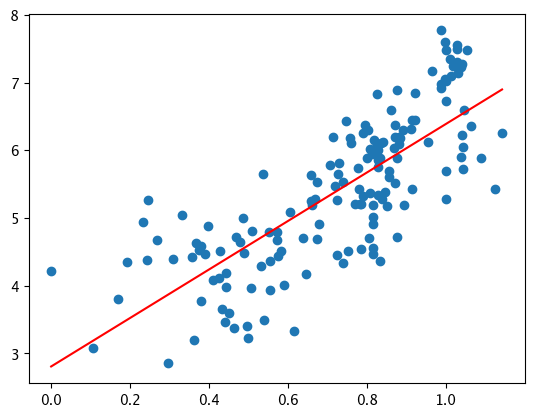

In [30]:
plotPrediction(b, x1, y1, predictFnc=simpleRegPredict)

### Calculating R2 
R2 = 1 - (RSS/TSS) <br>
* TSS is the total sum of squares
* RSS is the residual sum of squares

In [37]:
TSS = sum((y1 - np.mean(y1))**2)
R2 = 1 - (rss/TSS)
print(R2)

0.5938786572446549


What does a $R^2$ of 0.61 mean? 

### This is just a check to see if our code is working fine (delete): 
You can skip this in the lab - sklearn won't be allowed until DS3000. 